# 1D Diffusion

## Problem statement
The one-dimensional diffusion equation (Fick's second law) on a domain $x \in [0, 1]$ and for $t>0$ is given by
$$
\frac{\partial C}{\partial t} = D \frac{\partial^2 C }{\partial x^2}
$$
for a concentration $C(t, x)$ and with a diffusion coefficient $D$.
In this exercise, the equation is subject to the boundary conditions 
\begin{align}
    C(x=0, t) &= 1\\
    C(x=1, t) &= 0\\
\end{align}
and the initial values
\begin{equation}
    C(x, t=0) = 0.
\end{equation}

## Finite differences

A finite difference discretization can be formulated as 
$$
\frac{c^{n+1}_i - c^{n}_i}{\Delta t} = D \frac{c^n_{i+1}-2c^n_i+c^n_{i-1}}{4\Delta x},
$$
where $\Delta t$ is the discretization step in time and $\Delta x$ is the discretization step in space. Here, $n$ denotes time steps and $i$ denotes spatial steps.
This can be rearranged to get an explicit time integration scheme
$$
c^{n+1}_i= c^{n}_i + D \Delta t \frac{c^n_{i+1}-2c^n_i+c^n_{i-1}}{4\Delta x}.
$$

In [11]:
import numpy as np

# Define diffusion coefficient
D = 0.1

# Define discretization
dt = 0.1 
dx = 0.01
x = np.arange(0, 1, dx)
t = np.arange(0, 10, dt)
Nx = len(x)
Nt = len(t)

# Initialize concnetration values
c = np.zeros((Nx, Nt))

# Do the actual computation
for n in range(Nt-1):
    for i in range(1, Nx-1):
        c[i, n+1] = c[i, n] + D*dt/(4.0*dx)*(c[i+1, n] - 2*c[i, n] + c[i-1, n])
    # Boundary conditions
    c[0,n+1] = 1.0
    c[-1,n+1] = 0.0

## Results visualization
The results are plotted using matplotlib. Only every tenth result (in time) is plotted usign the ::10 notation.

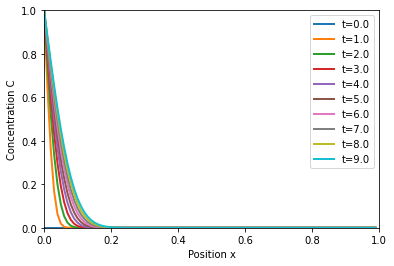

In [12]:
from matplotlib import pyplot as plt

plt.plot(x, c[:, ::10], linewidth=2)
plt.legend([f"t={tt}" for tt in t[::10]])
plt.xlim(0,1)
plt.xlabel("Position x")
plt.ylim(0,1)
plt.ylabel("Concentration C")
plt.show()